In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Fraud.csv") #reading the CSV file
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## EDA

In [4]:
df.describe() #summary of all the numeric variables

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df.isnull().any() #checking for null values

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [6]:
df['isFraud'].value_counts() #checking the distribution of the class

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot: xlabel='isFraud', ylabel='count'>

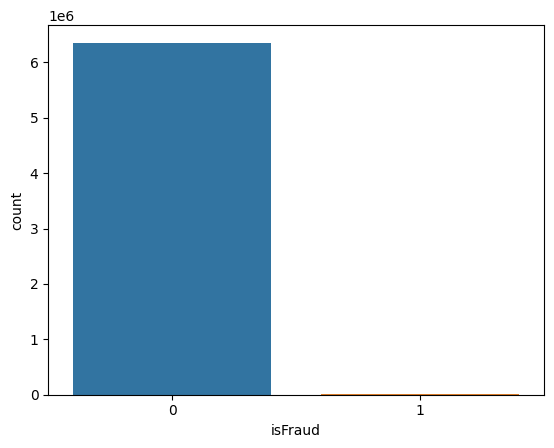

In [7]:
sns.countplot(data = df,x='isFraud')

In [8]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [9]:
(df['isFlaggedFraud']==df['isFraud']).value_counts()

True     6354423
False       8197
dtype: int64

In [10]:
df_fraud = df[df['isFraud']==1]
df_fraud['isFlaggedFraud'].value_counts()

0    8197
1      16
Name: isFlaggedFraud, dtype: int64

In [11]:
#We can see only 16 cases were detected as fraud out of around 8000 actual fraud cases. We dont't need isFlaggedFraud column.

df = df.drop(['isFlaggedFraud'],axis=1)

C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_35632\2753931539.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


<AxesSubplot: >

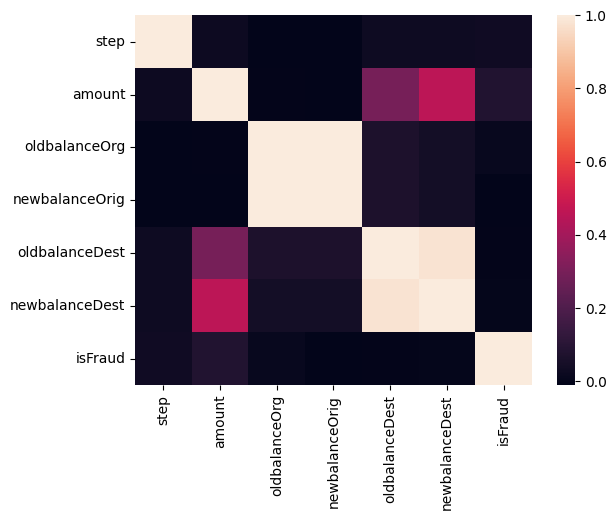

In [12]:
corr_df = df.corr()
sns.heatmap(corr_df) #heatmap to find correlation between variables

In [13]:
#The obvious correlation is between the variables oldbalanceOrg and	newbalanceOrig, and oldbalanceDest and newbalanceDest. When we make a 
#transaction of some amount, the old balance gets updated to the new balance for both the source and the destination. 
#So we can drop the new balance columns.

df = df.drop(['newbalanceOrig'],axis=1)
df = df.drop(['newbalanceDest'],axis=1)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,C553264065,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,C38997010,21182.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0.0,0


In [14]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

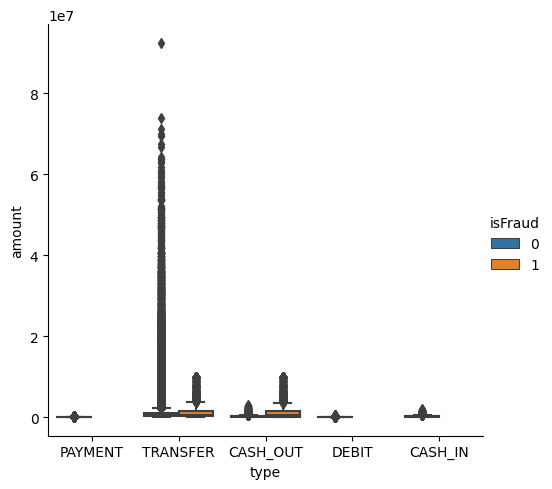

In [15]:

sns.catplot(data=df, x="type", y="amount",hue='isFraud', kind="box") #boxplot for each type of transaction

In [16]:
df[df['amount'] == max(df['amount'])] #checking for outlier, only 1 so we don't bother to remove it

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud
3686583,276,TRANSFER,92445516.64,C1715283297,0.0,C439737079,9595.98,0


In [17]:
fraud_dest = df.loc[df['isFraud']==1]['nameDest'] #checking for recipients of a fraud transaction
fraud_dest.value_counts()


C1193568854    2
C104038589     2
C200064275     2
C1497532505    2
C1601170327    2
              ..
C317811789     1
C24324787      1
C1053414206    1
C2013070624    1
C873221189     1
Name: nameDest, Length: 8169, dtype: int64

In [18]:
fraud_orig = df.loc[df['isFraud']==1]['nameOrig']  #checking for origin person of a fraud transaction
fraud_orig.value_counts()


C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
              ..
C570536992     1
C980546604     1
C58682758      1
C351713185     1
C1280323807    1
Name: nameOrig, Length: 8213, dtype: int64

In [19]:
#We can see that there is no destination or origin account having more than 2 fraud transactions so we can't conclude anything from it. 
#Hence, we remove these two columns.
df = df.drop(['nameOrig','nameDest'],axis=1)
df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.0,1
3,1,CASH_OUT,181.00,181.0,21182.0,1
4,1,PAYMENT,11668.14,41554.0,0.0,0


In [20]:
fraud_type = df.loc[df['isFraud']==1]['type'] 
fraud_type.value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [21]:
#Only CASH_OUT and TRANSFER type of transaction are fraudulent. Hence, the type of transaction plays a role in determining if 
#a transaction is fraud or not.

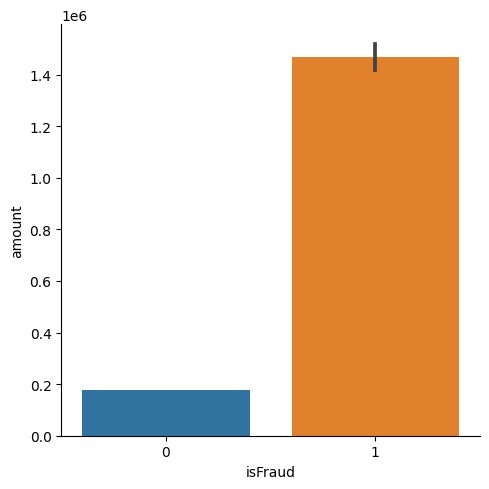

In [22]:
sns.catplot(data=df,x='isFraud',y='amount', kind='bar')

In [23]:
#We can also see a pattern here, usually low amount transactions have turned out to be fraud.
#There is a categorical column in the dataframe.

df = pd.get_dummies(df,columns=['type']) #One Hot Encoding
df.head()


,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,21182.0,1,0,1,0,0,0
4,1,11668.14,41554.0,0.0,0,0,0,0,1,0


In [24]:
y = df[['isFraud']] #target variable
X = df.drop(['isFraud'],axis=1) #features
X.head()

,step,amount,oldbalanceOrg,oldbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.0,0,0,0,0,1
3,1,181.00,181.0,21182.0,0,1,0,0,0
4,1,11668.14,41554.0,0.0,0,0,0,1,0


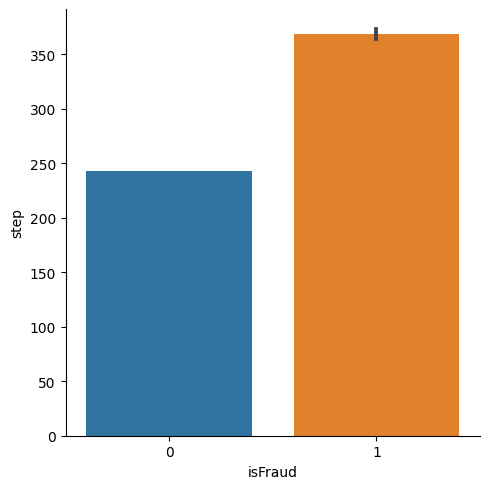

In [45]:
sns.catplot(data=df,x='isFraud',y='step', kind='bar')

In [ ]:
df_fraud = df[df['isFraud']==1]
df_non_fraud = df[df['isFraud']==0]
plt.plot(df_fraud['amount'], label='Fraud')
plt.plot(df_non_fraud['amount'], label='Non Fraud')
plt.show()

In [48]:
#fraud transatcions have a larger step values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [26]:
y_train.value_counts()

isFraud
0          4448179
1             5655
dtype: int64

We can see that the data is highly imbalanced. We have two options: Random undersampling or oversmapling using SMOTE. \
Note that our task is to detemine the fraud transactions correctly that is minimise false negatives that is maximise recall. 

## Undersampled data

In [28]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.8)
X_train_us, y_train_us = undersample.fit_resample(X_train, y_train)
y_train_us.value_counts()

isFraud
0          7068
1          5655
dtype: int64

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
import time

logreg = LogisticRegression()

start=time.time()
logreg.fit(X_train_us, y_train_us)
end = time.time()
print("Time Taken:", end-start)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))
print(classification_report(y_test, logreg_pred))
print("Recall :", metrics.recall_score(y_test,logreg_pred)*100)


c:\Users\Sucheta Jhunjhunwala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time Taken: 0.04842519760131836
Test Accuracy: 44.28%
              precision    recall  f1-score   support

           0       1.00      0.44      0.61   1906228
           1       0.00      0.91      0.00      2558

    accuracy                           0.44   1908786
   macro avg       0.50      0.68      0.31   1908786
weighted avg       1.00      0.44      0.61   1908786

Recall : 90.81313526192338


### SVM

In [30]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
start = time.time()
svc.fit(X_train_us, y_train_us)
end = time.time()
print("Time Taken:", end-start)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test Accuracy: {:.2f}%".format(svc_acc*100))
print(classification_report(y_test, svc_pred))
print("Recall :", metrics.recall_score(y_test,svc_pred)*100)


c:\Users\Sucheta Jhunjhunwala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Sucheta Jhunjhunwala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Time Taken: 0.4118976593017578
Test Accuracy: 85.85%
              precision    recall  f1-score   support

           0       1.00      0.86      0.92   1906228
           1       0.01      0.63      0.01      2558

    accuracy                           0.86   1908786
   macro avg       0.50      0.74      0.47   1908786
weighted avg       1.00      0.86      0.92   1908786

Recall : 62.86161063330727


### Gaussian Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

start = time.time()
nb = GaussianNB()
nb.fit(X_train_us, y_train_us)
end = time.time()
print("Time Taken:", end-start)

nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(nb_pred, y_test)
print("Test Accuracy: {:.2f}%".format(nb_acc*100))
print(classification_report(y_test, nb_pred))
print("Recall :", metrics.recall_score(y_test,nb_pred)*100)


Time Taken: 0.007511615753173828


c:\Users\Sucheta Jhunjhunwala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy: 95.18%
              precision    recall  f1-score   support

           0       1.00      0.95      0.98   1906228
           1       0.01      0.33      0.02      2558

    accuracy                           0.95   1908786
   macro avg       0.50      0.64      0.50   1908786
weighted avg       1.00      0.95      0.97   1908786

Recall : 32.60359655981235


### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_us, y_train_us)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(dt_pred, y_test)
print("Test Accuracy: {:.2f}%".format(dt_acc*100))
print(classification_report(y_test, dt_pred))
print("Recall :", metrics.recall_score(y_test,dt_pred)*100)


Test Accuracy: 97.70%
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1906228
           1       0.05      0.98      0.10      2558

    accuracy                           0.98   1908786
   macro avg       0.53      0.98      0.55   1908786
weighted avg       1.00      0.98      0.99   1908786

Recall : 98.2017200938233


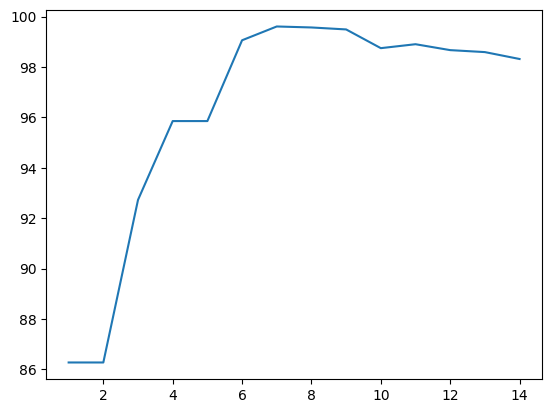

In [33]:
#to find the best depth
dt_dep=[] #list to store the recall_score for different depths
for i in range(1,15):
  dt=DecisionTreeClassifier(max_depth=i,random_state=51)
  dt.fit(X_train_us, y_train_us)
  dt_pred=dt.predict(X_test)
  dt_dep.append(metrics.recall_score(y_test,dt_pred)*100)

k=dt_dep.index(max(dt_dep))+1  #best depth
plt.plot(range(1,15),dt_dep)
plt.show()

In [34]:
dt = DecisionTreeClassifier(max_depth = k, random_state=51)
start = time.time()
dt.fit(X_train_us, y_train_us)
end = time.time()
print("Time Taken:", end-start)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(dt_pred, y_test)
print("Test Accuracy: {:.2f}%".format(dt_acc*100))
print(classification_report(y_test, dt_pred))
print("Recall :", metrics.recall_score(y_test,dt_pred)*100)


Time Taken: 0.03255820274353027
Test Accuracy: 95.16%
              precision    recall  f1-score   support

           0       1.00      0.95      0.98   1906228
           1       0.03      1.00      0.05      2558

    accuracy                           0.95   1908786
   macro avg       0.51      0.97      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786

Recall : 99.60906958561377


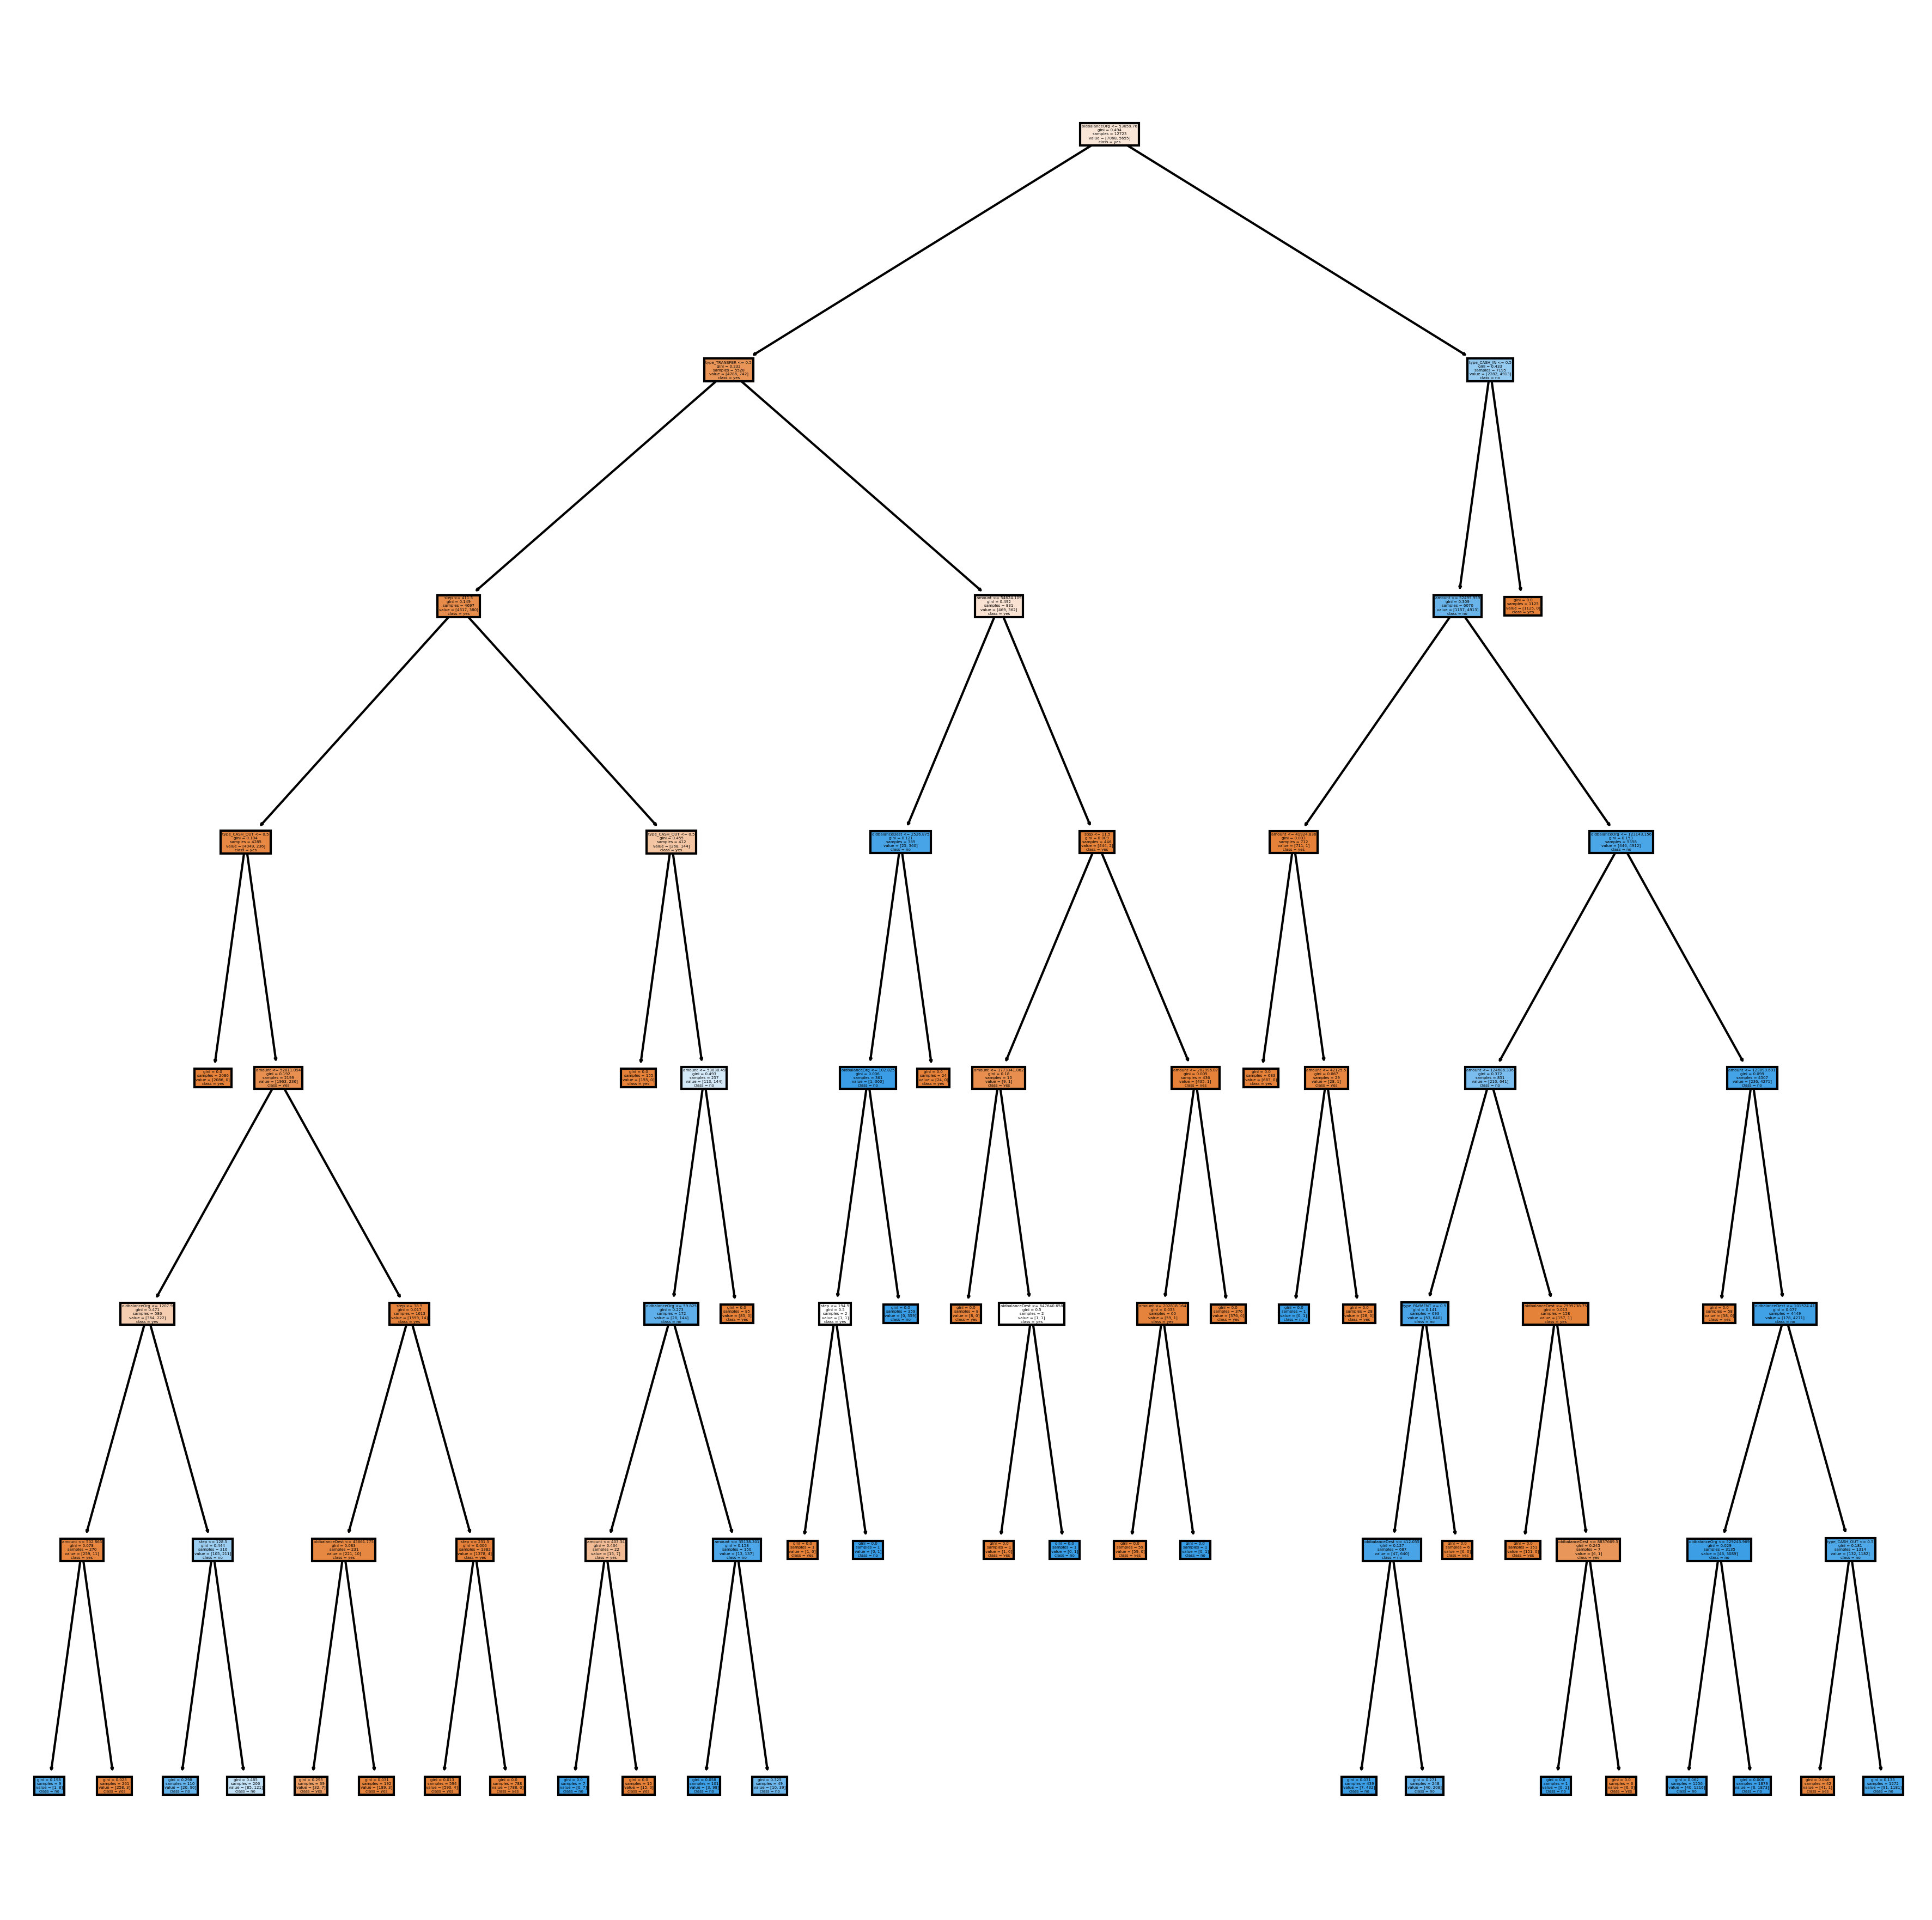

In [40]:
from sklearn.tree import export_graphviz
import sklearn
from six import StringIO  
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
feat=[]
for i in X_train_us.columns:
  feat.append(i)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)
sklearn.tree.plot_tree(dt,
               feature_names = feat, 
               class_names=["yes","no"],
               filled = True)
fig.savefig('imagename.png')

### Neural Network

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

In [36]:
model = Sequential()
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(32,activation = 'relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [41]:
%%time
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train_us, y_train_us,epochs=10,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/10
398/398 [==============================] - 104s 259ms/step - loss: 836.6256 - accuracy: 0.8604 - val_loss: 243.6221 - val_accuracy: 0.8708
Epoch 2/10
398/398 [==============================] - 81s 205ms/step - loss: 340.2287 - accuracy: 0.8548 - val_loss: 126.6175 - val_accuracy: 0.8917
Epoch 3/10
398/398 [==============================] - 72s 182ms/step - loss: 289.0025 - accuracy: 0.8610 - val_loss: 90.3370 - val_accuracy: 0.9103
Epoch 4/10
398/398 [==============================] - 89s 223ms/step - loss: 192.7152 - accuracy: 0.8466 - val_loss: 73.9240 - val_accuracy: 0.9197
Epoch 5/10
398/398 [==============================] - 76s 192ms/step - loss: 228.2854 - accuracy: 0.8203 - val_loss: 93.1560 - val_accuracy: 0.8960
Epoch 6/10
398/398 [==============================] - 62s 155ms/step - loss: 164.3729 - accuracy: 0.7834 - val_loss: 88.1734 - val_accuracy: 0.8825
Epoch 7/10
398/398 [==============================] - 62s 157ms/step - loss: 112.3610 - accuracy: 0.6673 - va

## Oversampled data

In [42]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)
y_train_os.value_counts()

isFraud
0          4448179
1          4448179
dtype: int64

### Logistic Regression

In [43]:
logreg = LogisticRegression()

start=time.time()
logreg.fit(X_train_os, y_train_os)
end = time.time()
print("Time Taken:", end-start)

logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))
print(classification_report(y_test, logreg_pred))
print("Recall :", metrics.recall_score(y_test,logreg_pred)*100)



c:\Users\Sucheta Jhunjhunwala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time Taken: 10.889909982681274
Test Accuracy: 41.12%
              precision    recall  f1-score   support

           0       1.00      0.41      0.58   1906228
           1       0.00      0.92      0.00      2558

    accuracy                           0.41   1908786
   macro avg       0.50      0.66      0.29   1908786
weighted avg       1.00      0.41      0.58   1908786

Recall : 91.67318217357311


### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

start=time.time()
dt.fit(X_train_os, y_train_os)
end = time.time()
print("Time Taken:", end-start)

dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(dt_pred, y_test)
print("Test Accuracy: {:.2f}%".format(dt_acc*100))
print(classification_report(y_test, dt_pred))
print("Recall :", metrics.recall_score(y_test,dt_pred)*100)


Time Taken: 101.5905213356018
Test Accuracy: 99.82%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906228
           1       0.41      0.86      0.55      2558

    accuracy                           1.00   1908786
   macro avg       0.70      0.93      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786

Recall : 85.6137607505864


In [46]:
#to find the best depth
dt_dep=[] #list to store the recall_score for different depths
for i in range(1,15):
  dt=DecisionTreeClassifier(max_depth=i,random_state=51)
  dt.fit(X_train_os, y_train_os)
  dt_pred=dt.predict(X_test)
  dt_dep.append(metrics.recall_score(y_test,dt_pred)*100)

k=dt_dep.index(max(dt_dep))+1  #best depth


In [47]:
dt = DecisionTreeClassifier(max_depth=k,random_state=51)

start=time.time()
dt.fit(X_train_os, y_train_os)
end = time.time()
print("Time Taken:", end-start)

dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(dt_pred, y_test)
print("Test Accuracy: {:.2f}%".format(dt_acc*100))
print(classification_report(y_test, dt_pred))
print("Recall :", metrics.recall_score(y_test,dt_pred)*100)

Time Taken: 42.18684363365173
Test Accuracy: 90.19%
              precision    recall  f1-score   support

           0       1.00      0.90      0.95   1906228
           1       0.01      1.00      0.03      2558

    accuracy                           0.90   1908786
   macro avg       0.51      0.95      0.49   1908786
weighted avg       1.00      0.90      0.95   1908786

Recall : 99.60906958561377


### Answers to the Questions

1. Data cleaning including missing values, outliers and multi-collinearity.\
Ans: There were no missing values in the data. Outliers have not been removed because they will be beneficial for fraud detecttion.\
Variables with high correlation were removed. As seen, new balance can be determined using the amount and old balance. 

2. Describe your fraud detection model in elaboration.\
Ans: Since the data was imbalanced, I oversmapled as well as undersampled the data. \
Decision Tree received the highest value for recall and precision. Our goal is to correctly predict an actual fraud transaction as fraud. The model outputs 0 or 1.\
Other models received very high accuracy but low recall so in this case, using Decision Tree would be the best option. \
A decision tree uses a tree-like structure that recursively partitions the data into branches based on the features values \
until something is predcited.

3. How did you select variables to be included in the model? \
Ans: Correlated variables were dropped. Some variables showed no significance in determining the category so they were also dropped.\
(Written in comments in the EDA code)

4. Demonstrate the performance of the model by using best set of tools.\
Ans: Decision Tree got a recall value of around 99% on both the oversamled and undersampled data. This model even had high accuracy. 

5. What are the key factors that predict fraudulent customer? \
Ans: In our case factors such as type of transaction (fraud occurs mainly in CASH_OUT and TRANSFER type transactions), the amount \
and the balance of the source and destination.\
Apart from that factors such as transaction history of the customers, frequency of each transaction, customer profile and many others.

6. Do these factors make sense? If yes, How? If not, How not?\
Ans: Yes, these factors make sense. Fraud transactions occur by deducting small amounts of money at frequent intervals so step and amount \
help in determining this. Usually when the cash flows out from the source account that is a fraud, that is in CASH_OUT and TRANSFER type \
of payment. TRANSFERS are made online so high chances of a fradulent link. Apart from that if the destination account has a low balance then \
chances of a fraud are high. 

7. What kind of prevention should be adopted while company update its infrastructure?\
Ans: (a) The links and apps being used for payment must be highly secured \
     (b) Checking for the authenticity of the Destinationcustomer by analysing previous records \
     (c) Keeping a check on the number of consecutive transactions \
     (d) Checking the type of transaction and keeping a check on the amount
     
     

8. Assuming these actions have been implemented, how would you determine if they work? \
Ans: The model, in my case Decision Tree, receives a very high accuracy so we can use it to predict. Whenever a new transaction occurs, \
predict the probability of it being fraudulent. If it's above a certain threshold, terminate it. Updating the data and the model with time is \
also necessary as new transactions take place.